# Hotel Booking 

Whenever we wish to travel to a place we need to book a hotel to stay. Here we are doing a complete analysis of a hotel booking dataset, how many bookings are canceled, for how many days people usually book the hotel, what is the best time etc.

I have downloaded the data from Kaggle from following link and uploaded the csv file in jupiter notebook and using it for  analysis by reading the file.
Dataset Link : https://www.kaggle.com/jessemostipak/hotel-booking-demand

In this notebook, I will perform exploratory data analysis using python to get the insight of the data.

In [1]:
project_name = "course-project2_Shatadru" 

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

In [4]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Creating a new project "shatadrusrc/course-project2_Shatadru"
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/shatadrusrc/course-project2-shatadru


'https://jovian.ai/shatadrusrc/course-project2-shatadru'

## Data Preparation and Cleaning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
df_Hotel = pd.read_csv("hotel_bookings.csv")

In [4]:
df_Hotel.shape

(119390, 32)

In [5]:
df_Hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [7]:
df_Hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Now let's check the missing values/NAN values in the dataset

In [13]:
[i for i in df_Hotel.columns if df_Hotel[i].isnull().sum()>0]

['children', 'country', 'agent', 'company']

Let's look at it in a heatmap

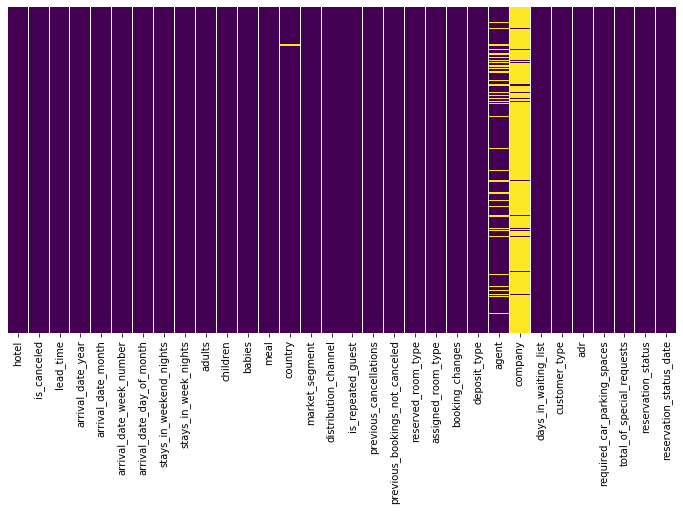

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_Hotel.isnull(), yticklabels=False, cbar=False, cmap='viridis');

We can see that company and agent columns are having large no of missing values. We can ignore those columns. Country has some amount of missing values. But children column has very few missing values which are undetectable in heatmap. Hence drop the columns having highest missing values.

In [15]:
df_Hotel = df_Hotel.drop(["company","agent"], axis = 1)

In [16]:
df_Hotel.shape

(119390, 30)

Now there are 30 columns in the data set after deletion of the two columns "company" and "agent". 

Still we can see in this data, country column has 488 rows of missing values . So removing those rows from the dataset.

In [17]:
df_Hotel = df_Hotel.dropna(axis = 0, subset=['country'])

In [18]:
df_Hotel.shape

(118902, 30)

In the dataset, children column has only 4 NAN values. So we can make those values as 0

In [19]:
df_Hotel['children'] = df_Hotel['children'].fillna(0.0)

Now let's check the null values again. 

In [20]:
[i for i in df_Hotel.columns if df_Hotel[i].isnull().sum()>0]

[]

No missing values are there now in the dataset.

Creating a new column Arrival_Date by combining day, month and year column and add it in the dataframe.

In [22]:
df_Hotel['Arrival_Date'] = df_Hotel['arrival_date_day_of_month'].astype(str) + "-" + df_Hotel['arrival_date_month'].astype(str)+ "-" + df_Hotel['arrival_date_year'].astype(str)

Convert the type of Arrival_Date from string to datetime format. 

In [23]:
df_Hotel['Arrival_Date'] = pd.to_datetime(df_Hotel['Arrival_Date'], errors='coerce')

In [24]:
df_Hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Arrival_Date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31


In [29]:
import jovian

In [7]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "shatadrusrc/course-project2-shatadru" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/shatadrusrc/course-project2-shatadru


'https://jovian.ai/shatadrusrc/course-project2-shatadru'

## Exploratory Analysis and Visualization


### Select the numeric columns to get the statistical data(mean,std, min, max etc)

In [35]:
num_cols=df_Hotel.select_dtypes(include=np.number).columns.tolist()
num_cols

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [36]:
df_Hotel_num = df_Hotel[['is_canceled', 'lead_time','stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'booking_changes', 'adr', 'total_of_special_requests']]

In [37]:
df_Hotel_num.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,booking_changes,adr,total_of_special_requests
count,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000
mean,0.371373,104.308027,0.928891,2.502136,1.858404,0.104203,0.221174,102.000808,0.571706
std,0.483174,106.903127,0.996211,1.900165,0.578576,0.399166,0.652775,50.487004,0.792678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000
25%,0.000000,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,70.000000,0.000000
50%,0.000000,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,95.000000,0.000000
75%,1.000000,161.000000,2.000000,3.000000,2.000000,0.000000,0.000000,126.000000,1.000000
max,1.000000,737.000000,16.000000,41.000000,55.000000,10.000000,21.000000,5400.000000,5.000000


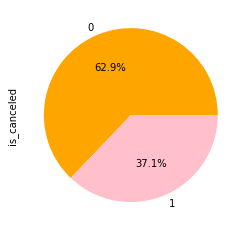

In [41]:
Cancelled = df_Hotel['is_canceled'].value_counts()
Cancelled.plot.pie(autopct='%1.1f%%', colors=['orange','pink'])
plt.show()

According to the pie chart, 62.9% of bookings were not canceled and 37.1% bookings are canceled at the hotel

### Checking travellers from which countries booked the hotels

In [42]:
country = df_Hotel.country.unique()

In [43]:
country

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

### Checking travellers are coming from how many unique countries.

In [44]:
print("Number of unique Countries : ", df_Hotel.country.nunique())

Number of unique Countries :  177


### Checking the types of meal provided by the hotels

In [45]:
print("Meal Types :",df_Hotel['meal'].unique())

Meal Types : ['BB' 'FB' 'HB' 'SC' 'Undefined']


### Checking the reservation status 

In [46]:
print(df_Hotel.reservation_status.unique())

['Check-Out' 'Canceled' 'No-Show']


### Numbers of bookings Datewise

In [47]:
City_hotel = df_Hotel[df_Hotel.hotel == 'City Hotel']
Resort_hotel = df_Hotel[df_Hotel.hotel == 'Resort Hotel']
Datewise_Booking_City = City_hotel["Arrival_Date"].value_counts().head(10)
Datewise_Booking_Resort = Resort_hotel["Arrival_Date"].value_counts().head(10)
print("City Hotel :\n" , Datewise_Booking_City)
print("Resort Hotel :\n" , Datewise_Booking_Resort)

City Hotel :
 2015-10-16    340
2016-10-13    322
2016-11-07    320
2015-09-18    311
2017-05-19    291
2015-08-14    289
2017-06-08    270
2016-06-17    270
2016-10-28    264
2017-05-15    257
Name: Arrival_Date, dtype: int64
Resort Hotel :
 2015-12-05    222
2016-02-12    175
2016-03-24    170
2016-02-26    153
2015-09-17    152
2016-05-12    150
2017-04-29    150
2017-05-25    143
2016-12-30    129
2017-01-16    129
Name: Arrival_Date, dtype: int64


#### Highest no of booking is done on 16th Oct,2015 in City hotel and on 5th Dec,2015 for Resort hotel

### Numbers of bookings in each year 

In [48]:
Yearwise_Booking = pd.value_counts(df_Hotel["arrival_date_year"])

In [49]:
Yearwise_Booking

2016    56435
2017    40604
2015    21863
Name: arrival_date_year, dtype: int64

In [52]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (6, 4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

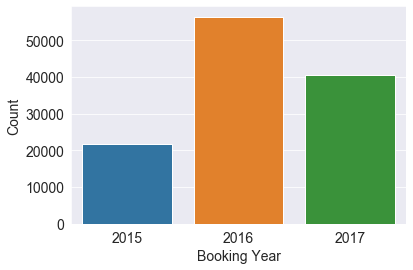

In [53]:
sns.barplot(Yearwise_Booking.index,Yearwise_Booking)
plt.xlabel("Booking Year")
plt.ylabel("Count")
plt.show()



#### From the above bar chart, we can infer that the highest no of bookings was occured in 2016.

### Number of bookings in each month 

In [54]:
monthly_Booking = pd.value_counts(df_Hotel["arrival_date_month"])

In [55]:
monthly_Booking

August       13856
July         12628
May          11779
October      11095
April        11045
June         10927
September    10467
March         9739
February      8012
November      6752
December      6728
January       5874
Name: arrival_date_month, dtype: int64

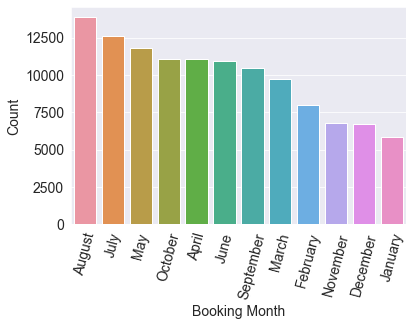

In [56]:
sns.barplot(monthly_Booking.index,monthly_Booking)
plt.xlabel("Booking Month")
plt.xticks(rotation=75)
plt.ylabel("Count")
plt.show()

#### From the above bar chart, we can infer that the total no of bookings is highest in "August" month and lowest in "January" month.But will it be same if we calculate the count of monthly data yearwise ?  Let's check it yearwise.

### Yearwise monthly Data

In [58]:
yearwise_data = df_Hotel.groupby(df_Hotel.arrival_date_year)

In [59]:
month_data = yearwise_data.arrival_date_month.value_counts()

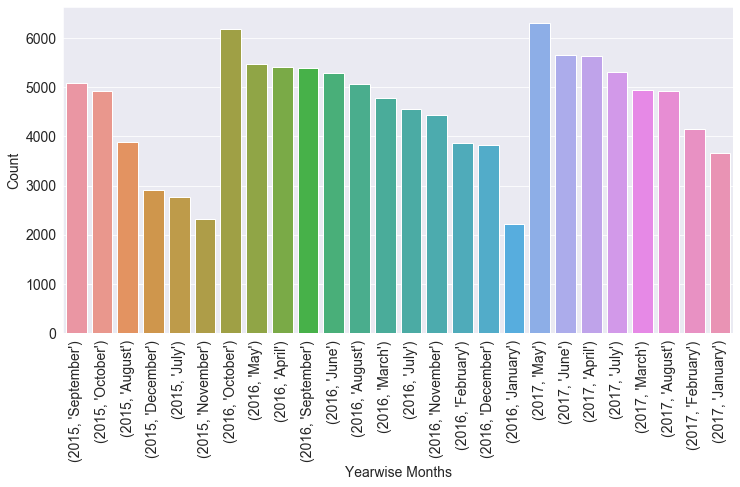

In [60]:
plt.figure(figsize=(12, 6))
sns.barplot(month_data.index,month_data)
plt.xlabel("Yearwise Months")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

#### From the above bar chart, we can infer that the highest number of booking was in "September" month in 2015 , in "October" month in 2016 and in "May" month in 2017. So it is not same as the total count of bookings if we calculate it monthwise irrespective of years.

### No of bookings for differnet market segment type

In [61]:
Market_data = df_Hotel.market_segment.value_counts()

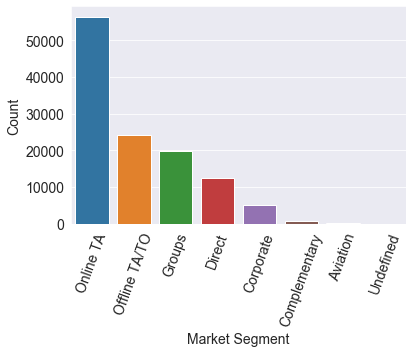

In [62]:
plt.xticks(rotation = 70)
sns.barplot(Market_data.index, Market_data )
plt.xlabel("Market Segment")
plt.ylabel("Count")
plt.show()

#### From the above chart, we can infer that bookings are mostly done via online/offline travel agencies.

### Lets see the different customer type and the count of booking in the hotel 

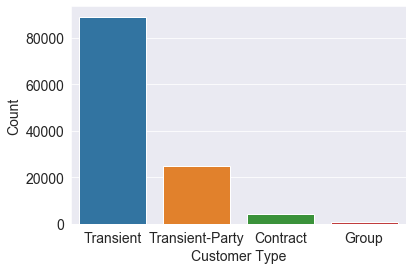

In [63]:
customer = df_Hotel.customer_type.value_counts()
sns.barplot(x=customer.index,y = customer);
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

#### From the above bar chart, we can infer that most of the customers are of Transient type

### Type of the assigned room in the hotel and the count of bookings for each room type

In [64]:
Assigned_Roomcount = df_Hotel.assigned_room_type.value_counts()

In [65]:
Assigned_Roomcount

A    73863
D    25166
E     7738
F     3732
G     2539
C     2354
B     2163
H      708
I      357
K      279
P        2
L        1
Name: assigned_room_type, dtype: int64

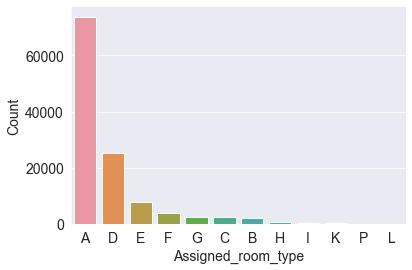

In [66]:
sns.barplot(x=Assigned_Roomcount.index,y = Assigned_Roomcount);
plt.xlabel('Assigned_room_type')
plt.ylabel('Count')
plt.show()

#### From the bar chart we can say that most of the customers prefered A and D type room. Top 5 assigned room types are A,D,E,F,G.

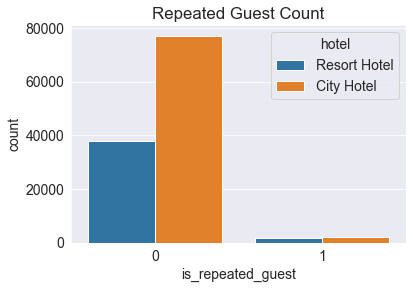

In [67]:
sns.countplot(data = df_Hotel, x = 'is_repeated_guest',hue = 'hotel')
plt.title('Repeated Guest Count')
plt.show()

#### We can observed from the above chart that there are very low no of repeated guest for both the hotels

In [8]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "shatadrusrc/course-project2-shatadru" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/shatadrusrc/course-project2-shatadru


'https://jovian.ai/shatadrusrc/course-project2-shatadru'

## Asking and Answering Questions

### 1. What is the number of bookings per hotel ? 

In [68]:
Booking = df_Hotel.iloc[:,[0,1]]
Booking

,hotel,is_canceled
0,Resort Hotel,0
1,Resort Hotel,0
2,Resort Hotel,0
3,Resort Hotel,0
4,Resort Hotel,0
...,...,...
119385,City Hotel,0
119386,City Hotel,0
119387,City Hotel,0
119388,City Hotel,0


In [69]:
confirmed_bookings = Booking[Booking.is_canceled == 0]

In [70]:
confirmed_bookings_count= confirmed_bookings['is_canceled'].count()
confirmed_bookings_count

74745

In [71]:
confirmed_bookings.groupby('hotel').count()

,is_canceled
hotel,
City Hotel,46226
Resort Hotel,28519


#### Ans : We can see the total no of bookings in "City" hotel is 46226 and in "Resort" hotel is 28519

### 2. Which hotel have higher cancelation rate?

In [72]:
City_hotel = Booking[Booking.hotel == 'City Hotel']
Resort_hotel = Booking[Booking.hotel == 'Resort Hotel']

In [73]:
#### calculating the cancel rate per hotel
cancel_City = round(len(City_hotel[City_hotel.is_canceled == 1]) / len(City_hotel),3)
cancel_Resort = round(len(Resort_hotel[Resort_hotel.is_canceled == 1]) / len(Resort_hotel),3)

In [74]:
print ("Cancelation rate for City hotel :" , cancel_City )
print ("Cancelation rate for Resort hotel :" ,cancel_Resort)

Cancelation rate for City hotel : 0.417
Cancelation rate for Resort hotel : 0.28


#### Ans : City hotel has higher cancelation rate than Resort hotel.

### 3. Which kind of meal customers order most ?

In [75]:
mealcount = df_Hotel.meal.value_counts()
mealcount 

BB           91867
HB           14434
SC           10638
Undefined     1165
FB             798
Name: meal, dtype: int64

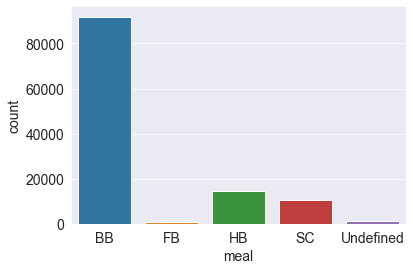

In [84]:
sns.countplot(df_Hotel.meal);

In [96]:
df_Hotel.meal.value_counts(normalize=True, sort=True)*100

BB           77.262788
HB           12.139409
SC            8.946864
Undefined     0.979798
FB            0.671141
Name: meal, dtype: float64

#### Ans : We can clearly infer from this pie chart, that most of the customer (around 77%) ordered BB type meal. 12% customers ordered HB meal and 9% customer ordered SC type meal.  

### 4. From which country the no. of booking is highest ? 

In [88]:
count = df_Hotel.country.value_counts()
max_count = count.max()
print("The no of booking is highest for '{}' country ".format(df_Hotel.country[max_count]))

The no of booking is highest for 'PRT' country 


#### Ans : The no of booking in hotels is highest from the country "Portugal"

### 5. Which hotel is more expensive ?

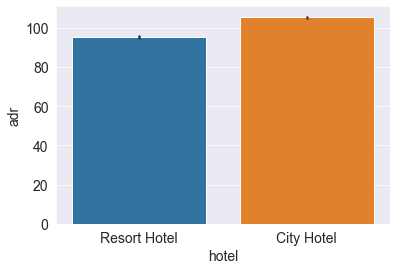

In [90]:
sns.barplot(data = df_Hotel, x= "hotel", y ="adr")
plt.show()

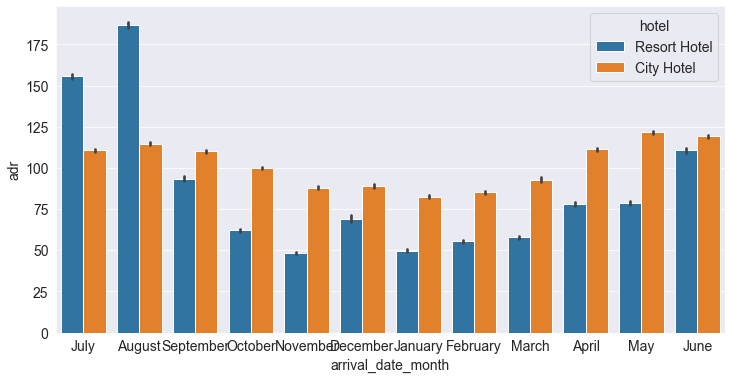

In [91]:
plt.figure(figsize=(12,6))
sns.barplot(data = df_Hotel, x= "arrival_date_month", y ="adr", hue = 'hotel')
plt.show()

#### City hotel is more expensive overall but if we check monthly data, Resort hotel is more expensive in July and August and for all other months City hotel is expensive than Resort hotel 

In [60]:
import jovian

In [9]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "shatadrusrc/course-project2-shatadru" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/shatadrusrc/course-project2-shatadru


'https://jovian.ai/shatadrusrc/course-project2-shatadru'

## Inferences and Conclusion

From the above exploratory analysis, we can infer that,

1. City hotel is more expensive than Resort hotel and the cancellation rate of city hotel is also 2times higher than resort hotel.
2. Among the total no of bookings in both the hotel,37.1% bookings are canceled. 62.9% of bookings were confirmed.
3. 2016 is the year in which we observed highest no of bookings.
4. Most of the bookings were done via online/offline travel agencies and the customers are of transient type.
5. Most of the customers prefer A or D type room and chooses BB(Bed & breakfast) type meals.
6. There are very low no of repeated guests for both the hotels.
7. There are 177 unique countries from where travellers came among which Portugal is the highest.


In [ ]:
import jovian

In [ ]:
jovian.commit()

## References

1. https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas
2. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
3. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html
4. https://youtu.be/H28y6u_vSLg
5. https://numpy.org/doc/stable/reference/

## Future Work

We can do further exploratory analysis on lead time before arriving the hotel, how many the customer changes the booking and how are the deposit type, what is the price of the hotel etc. Also we can find the correlation between two or more attributes of the dataset to find which one is more important. We can do further prediction on which season is best for travelling and hotel booking.

In [10]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "shatadrusrc/course-project2-shatadru" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/shatadrusrc/course-project2-shatadru


'https://jovian.ai/shatadrusrc/course-project2-shatadru'